In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


h = 0.6711

def bin_data_with_mask(x, y, num_bins=20):
    bins = np.geomspace(np.min(x), np.max(x), num_bins + 1)
    bin_indices = np.digitize(x, bins) - 1
    bin_averages = [np.median(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)]
    bin_centers = (bins[:-1] + bins[1:]) / 2
    return bin_centers, np.array(bin_averages), x, y
    
def subhalo_graph_bh_vs_stellar_mass(snapshot_file, fof_file, label):
    fig, ax = plt.subplots(figsize=(6, 5))  

    try:
        with h5py.File(snapshot_file, "r") as data, h5py.File(fof_file, 'r') as f:
            redshift = data["Header"].attrs["Redshift"]
            
            print(f"Loaded snapshot: {snapshot_file}")
            print(f"Redshift z = {redshift:.3f}")
            
            subhalo_group_nr = f['Subhalo/SubhaloGroupNr'][:]
            subhalo_bh_masses = f["Subhalo/SubhaloMassType"][:, 5] * 1e10 / h 
            total_mass = f["Subhalo/SubhaloMass"][:] * 1e10 / h
            
            bh_mass_ratio = subhalo_bh_masses / total_mass
            
            valid = (total_mass > 0) & (bh_mass_ratio > 0) & np.isfinite(bh_mass_ratio)
            bh_masses = subhalo_bh_masses[valid]
            bh_mass_ratios = bh_mass_ratio[valid]
            total_mass = total_mass[valid]
            
            binned_x, bin_averages, rawX, rawY = bin_data_with_mask(total_mass, bh_mass_ratios)

            ax.scatter(rawX, rawY, color="blue", alpha=0.3, s=5)
            ax.plot(binned_x, bin_averages, color="black", linestyle="--", linewidth=2)

            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlabel("Total Mass (Msun)")
            ax.set_ylabel("BH Mass / Total Mass")
            ax.set_title(f"Subhalo {label} z={redshift:.2f}")
            ax.grid(alpha=0.3)

            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"Snapshot file {snapshot_file} or catalog {fof_file} not found.")
        
def halo_graph_bh_vs_stellar_mass(snapshot_file, fof_file, label):
    fig, ax = plt.subplots(figsize=(6, 5))  

    try:
        with h5py.File(snapshot_file, "r") as data, h5py.File(fof_file, 'r') as f:
            redshift = data["Header"].attrs["Redshift"]
            
            print(f"Loaded snapshot: {snapshot_file}")
            print(f"Redshift z = {redshift:.3f}")
            
            halo_bh_masses = f["Group/GroupMassType"][:, 5] * 1e10 / h 
            total_mass = f["Group/GroupMass"][:] * 1e10 / h
            
            bh_mass_ratio = halo_bh_masses / total_mass
            
            valid = (total_mass > 0) & (bh_mass_ratio > 0) & np.isfinite(bh_mass_ratio)
            bh_masses = halo_bh_masses[valid]
            bh_mass_ratios = bh_mass_ratio[valid]
            total_mass = total_mass[valid]
            
            binned_x, bin_averages, rawX, rawY = bin_data_with_mask(total_mass, bh_mass_ratios)

            ax.scatter(rawX, rawY, color="blue", alpha=0.3, s=5)
            ax.plot(binned_x, bin_averages, color="black", linestyle="--", linewidth=2)

            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlabel("Total Mass (Msun)")
            ax.set_ylabel("BH Mass / Total Mass")
            ax.set_title(f"Halo {label} z={redshift:.2f}")
            ax.grid(alpha=0.3)

            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"Snapshot file {snapshot_file} or catalog {fof_file} not found.")

Loaded snapshot: data/Output-simba/snap_004.hdf5
Redshift z = 2.993


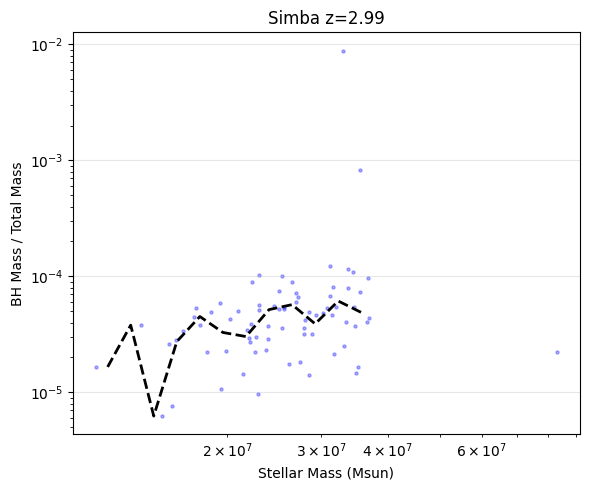

Loaded snapshot: data/Output-fidTNG/snap_004.hdf5
Redshift z = 3.008


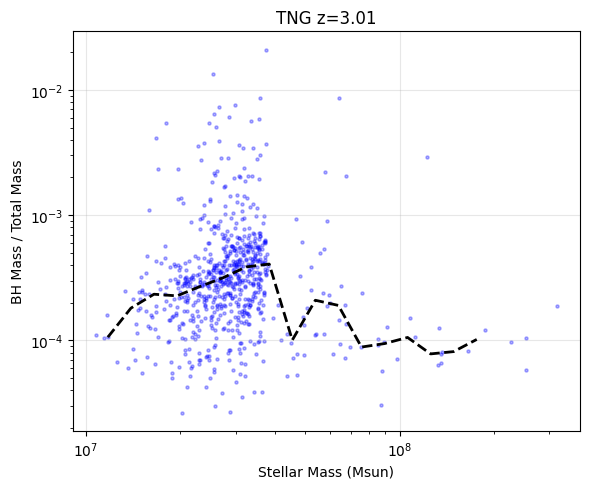

Loaded snapshot: data/Output-simba/snap_032.hdf5
Redshift z = 0.051


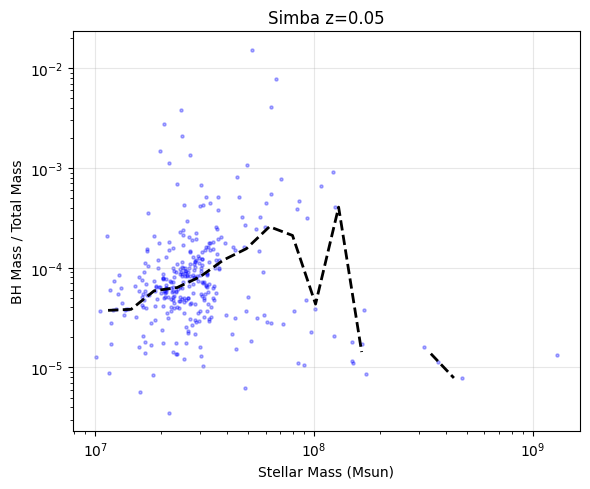

Loaded snapshot: data/Output-fidTNG/snap_032.hdf5
Redshift z = 0.049


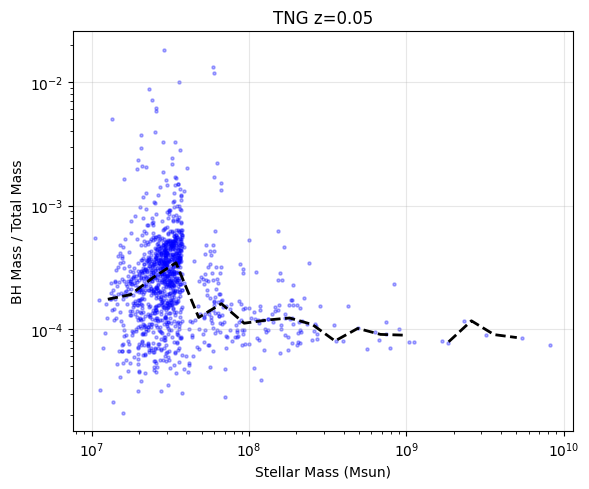

Loaded snapshot: data/Output-simba/snap_004.hdf5
Redshift z = 2.993


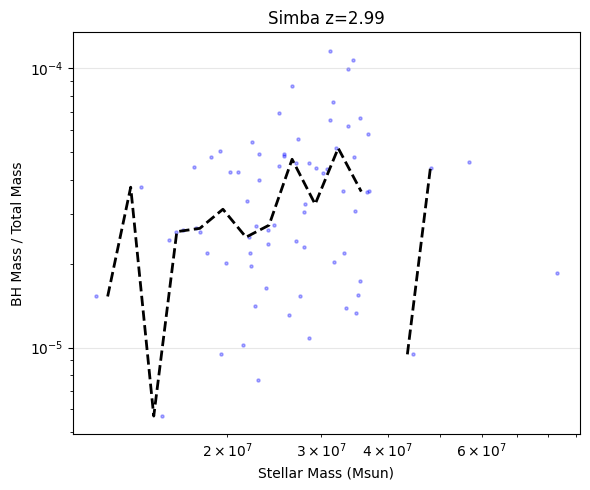

Loaded snapshot: data/Output-fidTNG/snap_004.hdf5
Redshift z = 3.008


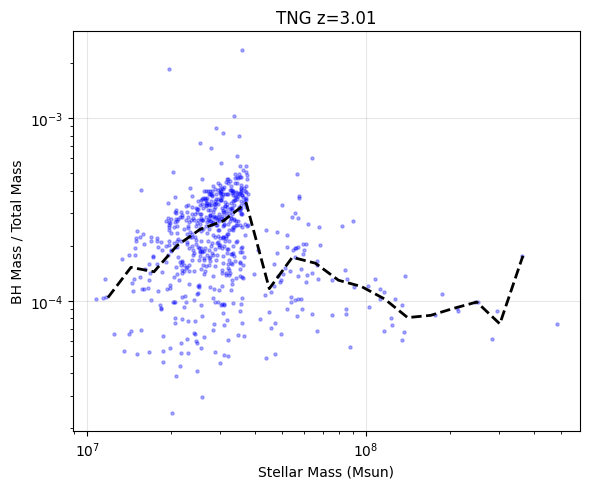

Loaded snapshot: data/Output-simba/snap_032.hdf5
Redshift z = 0.051


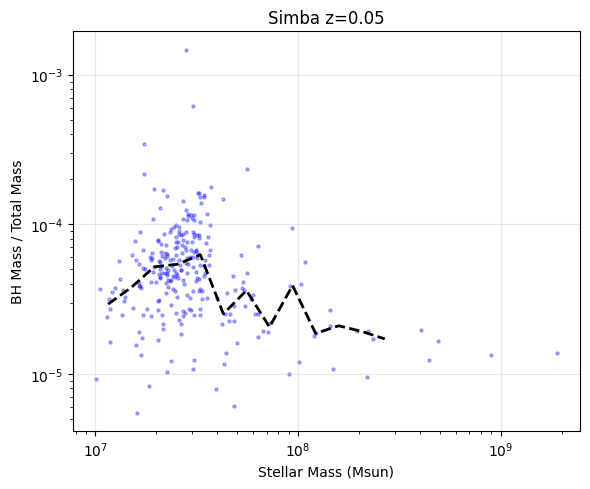

Loaded snapshot: data/Output-fidTNG/snap_032.hdf5
Redshift z = 0.049


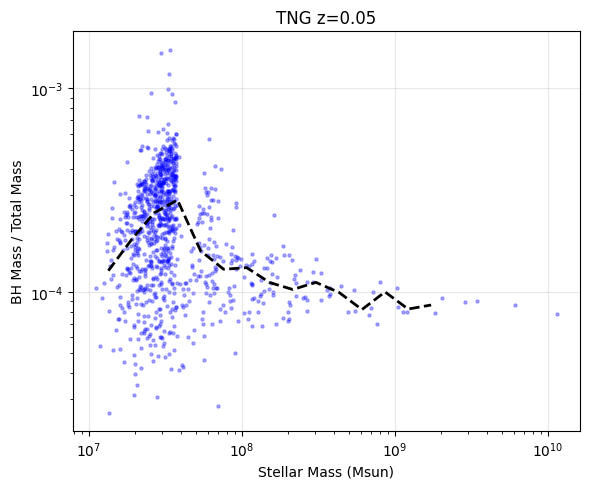

In [13]:
snap_simba_z3 = "data/Output-simba/snap_004.hdf5"
fof_simba_z3  = "data/Output-simba/fof_subhalo_tab_004.hdf5"
snap_tng_z3   = "data/Output-fidTNG/snap_004.hdf5"
fof_tng_z3    = "data/Output-fidTNG/fof_subhalo_tab_004.hdf5"

snap_simba_z0 = "data/Output-simba/snap_032.hdf5" 
fof_simba_z0  = "data/Output-simba/snap_032.hdf5"
snap_tng_z0   = "data/Output-fidTNG/fof_subhalo_tab_032.hdf5"
fof_tng_z0    = "data/Output-fidTNG/fof_subhalo_tab_032.hdf5"


subhalo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-simba/snap_004.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_004.hdf5",
    label="Simba"
)

subhalo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-fidTNG/snap_004.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_004.hdf5",
    label="TNG"
)

subhalo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-simba/snap_032.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_032.hdf5",
    label="Simba"
)

subhalo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-fidTNG/snap_032.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_032.hdf5",
    label="TNG"
)

halo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-simba/snap_004.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_004.hdf5",
    label="Simba"
)

halo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-fidTNG/snap_004.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_004.hdf5",
    label="TNG"
)

halo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-simba/snap_032.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_032.hdf5",
    label="Simba"
)

halo_graph_bh_vs_stellar_mass(
    snapshot_file="data/Output-fidTNG/snap_032.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_032.hdf5",
    label="TNG"
)
